In [55]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Homework 3 - Alex Perez - Data Structures

## 4. Implement factorials with recursion

Recall that a factorial number is defined as:

$k! = k \times (k-1) \times (k-2) \times ... \times 2 \times 1$

For example: $3! = 3 \times 2 \times 1 = 6$

1. Use recursion to implement the factorial

In [2]:
def factorial(n):
    
    if n>1:
        result = n*factorial(n-1)
        return result
    else:
        return 1

In [57]:
factorial(7)

5040

In [75]:
factorial(5)

120

In [76]:
factorial(8)

40320

2. Run your code for numbers between 1 and 10000

Python will return an error if we try to execute this recursive function, factorial, for large numbers such as 10000. Because of this, the limit of the calculations tried in this Homework will be 1000, so Python won't return any errors as before. 

In order to prove that the method is working, the following for loop will only display the first result of the first 20 numbers. Iis in question 3 that the code is executed for numbers between 1 and 1000. 

In [5]:
for i in range (1,20):
    print(factorial(i))

1
2
6
24
120
720
5040
40320
362880
3628800
39916800
479001600
6227020800
87178291200
1307674368000
20922789888000
355687428096000
6402373705728000
121645100408832000


3. Calculate the execution time and plot it

In [103]:
from time import time

def timer_func(func):
    def wrap_func(*args, **kwargs):
        
        t1 = time()*10**6
        result = func(*args, **kwargs)
        t2 = time()*10**6
        
        return t2-t1
    
    return wrap_func 

@timer_func
def factorialTime(n):
    
    if n>1:
        result = n*factorialB(n-1)
        return result
    else:
        return 1

In [104]:
total_time = list()

for i in range(1,1001):
    
    total_time.append(factorialTime(i))

In [105]:
df = pd.DataFrame()
df['time'] = total_time

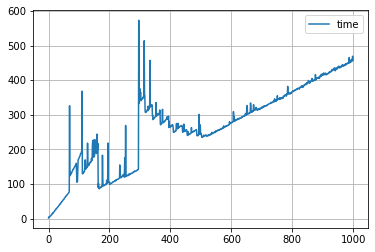

In [106]:
df.plot()
plt.grid()

3. What's the complexity?

From the plot, it can be seen that the complexity follows a linear growth. If instead of 1000 operations, 100 operations are executed, the plot will look like this:

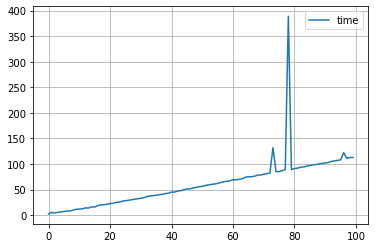

In [115]:
total_time = list()

for i in range(1,101):
    
    total_time.append(factorialTime(i))
    
df = pd.DataFrame()
df['time'] = total_time
df.plot()
plt.grid()

Where, again, the plot follows a linear growth $O(n)$. 

5. Implement memoization to improve the performance of your code

In [116]:
def memoize_factorial(n):
    
    cache = {}
    
    def factorial(n):
        if n in cache.keys():
            return cache[n]
        
        if n>1:
            result = n*factorial(n-1)
        
        else:
            return 1
        
        cache[n]=result
        return result
    return factorial(n)

In [117]:
memoize_factorial(7)

5040

In [118]:
memoize_factorial(8)

40320

In [119]:
memoize_factorial(5)

120

6. Measure the runtime when you calculate the factorial for numbers between 1 and 10000.

Again, the code will calculate the factorial for numbers between 1 and 1000.

In [120]:
@timer_func
def memoize_factorialTime(n):
    
    cache = {}
    
    def factorial(n):
        if n in cache.keys():
            return cache[n]
        
        if n>1:
            result = n*factorial(n-1)
        
        else:
            return 1
        
        cache[n]=result
        return result
    return factorial(n)

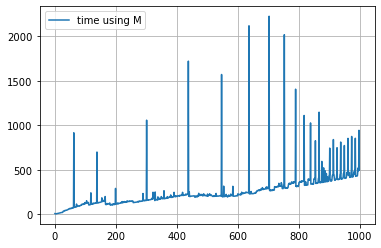

In [126]:
total_time = list()

for i in range(1,1001):
    
    total_time.append(memoize_factorialTime(i))
    
df = pd.DataFrame()
df['time using M'] = total_time
df.plot()
plt.grid()

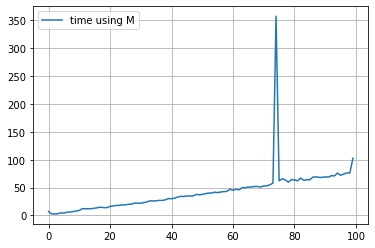

In [129]:
total_time = list()

for i in range(1,101):
    
    total_time.append(memoize_factorialTime(i))
    
df = pd.DataFrame()
df['time using M'] = total_time
df.plot()
plt.grid()

7. What's the complexity of your code using memoization?

From the plot, it can be seen that the complexity follows a linear growht $O(n/2) \approx O(n)$.

8. How does the first implementation and the one with memoization compare?

After analyzing the results, stating the complexity using memoization seems a bit wrong. By first attempt, following the growth showed in the plot, it seems that it also has a linear growth. But, given it a little more thought and executing the factorial using memoization, we get the next following comparisons:

In [164]:
factorialTime(10)

24.75

In [165]:
memoize_factorialTime(10)

20.25

In [166]:
factorialTime(100)

177.0

In [167]:
memoize_factorialTime(100)

130.75

In [168]:
factorialTime(500)

913.25

In [169]:
memoize_factorialTime(500)

614.0

In [170]:
factorialTime(1000)

2160.0

In [171]:
memoize_factorialTime(1000)

1632.0

Eventhough the rumtime follows a linear growth, it is clear that using memoization is a more efficient and faster implementation of the factorial method using recurssion. 